In [4]:
import requests 
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Get Data

In [5]:
def get_data(url):
    '''Get the datasets from the Driven Data website by specific URLs and return a dataframe.'''
    
    html = requests.get(url)
    text = html.text.splitlines()
    
    # split each line into the columns, seperated by commas
    split_text = []
    for i in text:
        split_text.append(i.split(','))
     
    # get column names from first line
    col_names = split_text[0]
    
    value_dict = dict()
    # for each line add number of line as key and data as values to value_dictionary
    for i in range(1,len(split_text)):
        value_dict[i] = split_text[i]
    
    # create dataframe using column names and dictionary of data
    df = pd.DataFrame.from_dict(value_dict, orient='index', columns = col_names)
    
    # convert dtype into int or category
    pattern = re.compile(r'_id$|count_|age|_percentage$|has_|_grade$')
    for i in df.columns:
        if re.search(pattern, i):
            df[i] = df[i].astype(int)
        else:
            df[i] = df[i].astype('category')
    
    return df
    

In [6]:
# create dataframe of train values
train_X = get_data("https://s3.amazonaws.com/drivendata/data/57/public/train_values.csv")
train_y = get_data("https://s3.amazonaws.com/drivendata/data/57/public/train_labels.csv")

## Null values

In [7]:
# check for null values
train_X.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:
# show each unique value for each column
for i in train_X.columns:
    print(i,train_X[i].unique())

building_id [802906  28830  94947 ... 602512 151409 747594]
geo_level_1_id [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_2_id [487 900 363 ...  77 115 627]
geo_level_3_id [12198  2812  8973 ...  3152  5276  3085]
count_floors_pre_eq [2 3 1 4 5 6 7 8 9]
age [ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
area_percentage [  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  96  80  90  82  69]
height_percentage [ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]
land_surface_condition [t, o, n]
Categories (3, obj

## Visualize Data

Text(0.5, 1.0, 'Number of Buildings with Each Damage Grade')

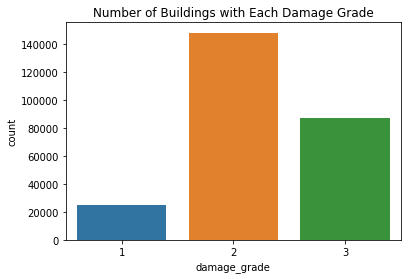

In [9]:
sns.countplot(x='damage_grade',data=train_y)
plt.title('Number of Buildings with Each Damage Grade')

In [10]:
# numeric values of data columns not including building_id and binary columns
sel_features = ['count_floors_pre_eq','age','area_percentage','height_percentage','count_families']
train_features = train_X[sel_features]
# combine with y (damage_grade)
train_features['damage_grade'] = train_y['damage_grade']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,damage_grade
1,2,30,6,5,1,3
2,2,10,8,7,1,2
3,2,10,5,5,1,3
4,2,10,6,5,1,2
5,3,30,8,9,1,3


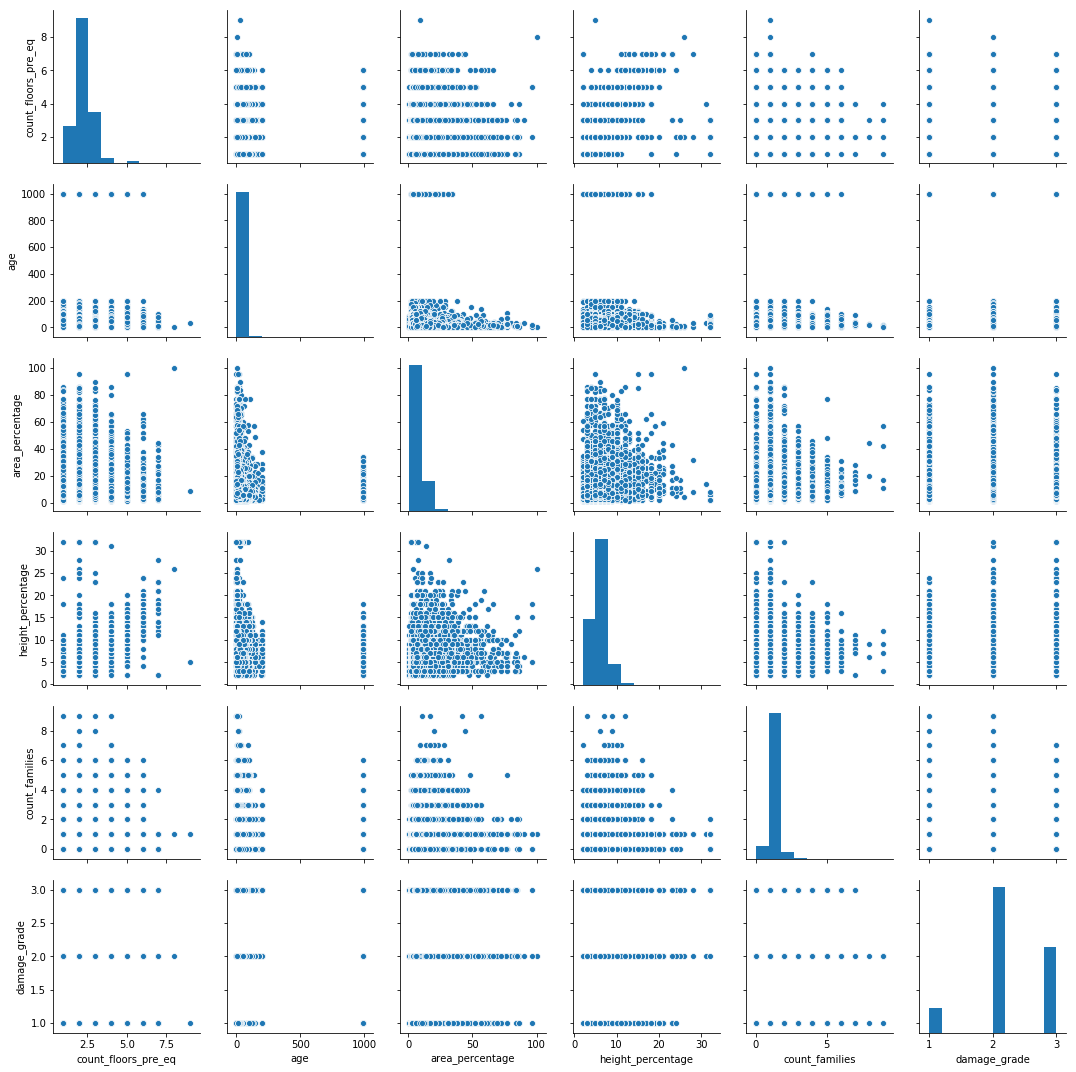

In [11]:
sns.pairplot(train_features)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


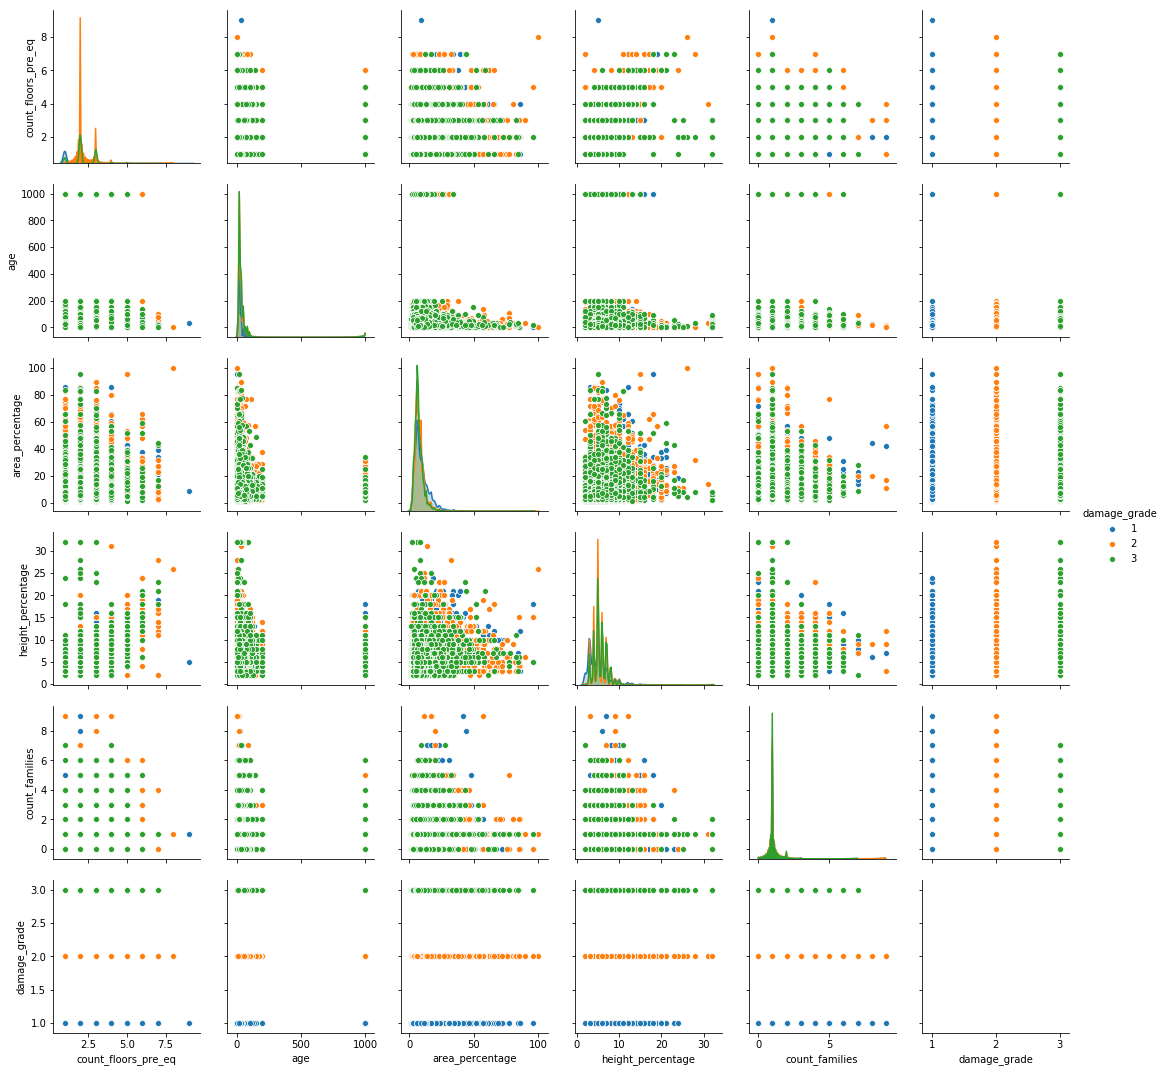

In [12]:
sns.pairplot(train_features, hue='damage_grade')

## Dummy Variables

In [14]:
train_X = pd.get_dummies(train_X)

In [15]:
train_X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
1,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
2,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
3,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
5,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


## Model

In [32]:
train_y = train_y[['damage_grade']]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier

In [23]:
X_train,X_test,y_train,y_test = train_test_split(train_X, train_y, test_size=0.8, random_state=2)

In [43]:
def test_models(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    f1 = f1_score(y_test,y_pred,average='micro')
    # classification_report(y_test,y_pred)
    return f1

In [ ]:
models = [ LogisticRegression(), GaussianNB(), GradientBoostingClassifier(), RandomForestClassifier(),
          BaggingClassifier()]
for clf in models:
    print(test_models(clf,X_train,X_test,y_train,y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5682963915176923


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5657014308258307


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# test_X = get_data("https://s3.amazonaws.com/drivendata/data/57/public/test_values.csv")
# test_X = pd.get_dummies(test_X)